Task P1.1
Multinomial distributed random numbers

a) Create a multinomial distribution from the example
le anthrokids.csv: Use the column age
and round the
oating point values to obtain integers. Count the frequencies of the integers and
use them as basis of the distribution

b) Sample from the multinomial distribution.

In [35]:
import pandas as pd
import numpy as np

data = pd.read_csv('anthrokids.csv')

data['age'] = data['age'].round().fillna(0).astype(int)


age_counts = data['age'].value_counts()

age_probabilities = age_counts / age_counts.sum()

from scipy.stats import multinomial

n = len(age_probabilities)
p = age_probabilities.values

num_samples = 1000

# Sample from the multinomial distribution
samples = multinomial.rvs(n=num_samples, p=p)

print(samples)


[80 69 70 85 75 84 73 82 65 45 42 71 38 37 35 34  9  6  0  0]


c) Check if Samples Follow the Distribution:
To check if your samples follow the distribution, you can compare the expected probabilities (from the distribution) with the observed frequencies in your samples. You can use a statistical test like the Chi-Square test to determine if there is a significant difference between the observed and expected counts. If the p-value of the test is high, it suggests that the samples are consistent with the expected distribution.

Chi-squared statistic: 0.0
P-value: 1.0
The observed counts follow the expected distribution.


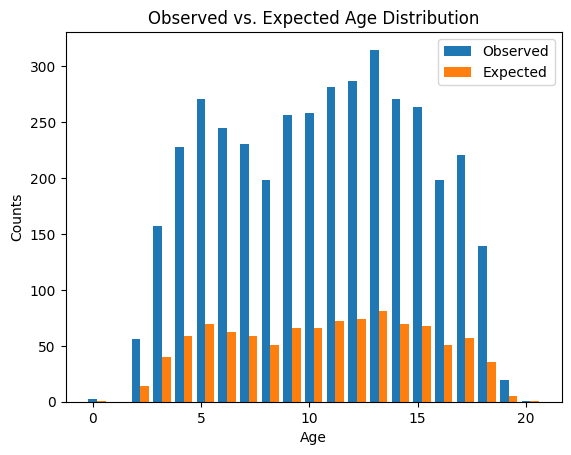

In [38]:
from scipy.stats import chi2_contingency

observed_counts = samples

expected_counts = num_samples * p

# Filter out categories with zero observed counts
nonzero_indices = np.where(observed_counts > 0)
observed_counts_nonzero = observed_counts[nonzero_indices]
expected_counts_nonzero = expected_counts[nonzero_indices]

chi2, p_value, dof, expected = chi2_contingency(observed_counts_nonzero.reshape(1, -1))

print("Chi-squared statistic:", chi2)
print("P-value:", p_value)

plt.bar(age_counts.index, age_counts, width=0.4, label='Observed')
plt.bar(age_counts.index + 0.4, expected_counts, width=0.4, label='Expected')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.title('Observed vs. Expected Age Distribution')
plt.show()



Uniformly distributed random numbers

a) Implement a way to generate uniformly distributed one-dimensional random numbers. Make
sure that your implementation can be parametrized.

In [47]:
def random_number(a, b, m, prev_number):
    return (a * prev_number + b) % m

def generate_uniform_samples(min_value, max_value, n_samples):

    generated_number = 42
    a = 1103515245
    b = 12345
    m = 2**31

    uniform_samples = []

    for _ in range(n_samples):
        generated_number = random_number(a, b, m, generated_number)
        uniform_samples.append(min_value + (generated_number / m) * (max_value - min_value))

    return uniform_samples

b) Use the random number generator from 2 a) to create a sample set of random numbers. Esti-
mate the parameters of the underlying uniform distribution from this sample set. What do you
observe? How accurate is your parameter estimate? What happens if the size of the sample set
changes?

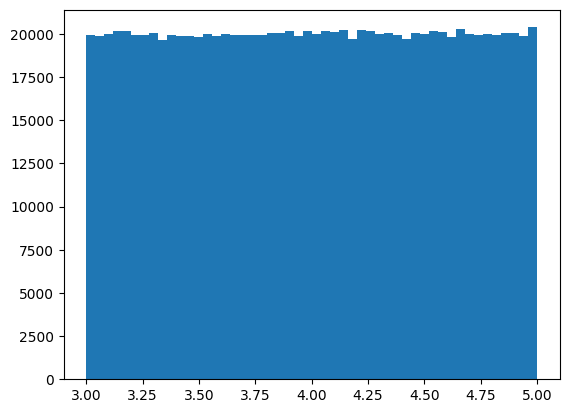

In [48]:
n_samples = 1000000
min_value = 3
max_value = 5

generated_samples = generate_uniform_samples(min_value, max_value, n_samples)
plt.hist(generated_samples, bins=50)
plt.show()

**c)** How can you check if your random numbers really follow the distribution from 2 a)?

In [49]:
np.min(generated_samples), np.max(generated_samples)

(3.000000168569386, 4.9999988386407495)

Task P1.3

Normally distributed random numbers
a) Implement a way to generate normally distributed one-dimensional random numbers with mean
0 and standard deviation of 1.0.

In [50]:
def generate_normal_samples(mean, std, n_samples):

    u_1 = 42
    a = 1103515245
    b = 12345
    m = 2**31

    normal_samples_z1 = []
    normal_samples_z2 = []

    for _ in range(n_samples):
        u_1 = random_number(a, b, m, u_1)
        u_2 = random_number(a, b, m, u_1)

        z_1 = np.cos(2 * np.pi * u_1 / m) * np.sqrt(-2 * np.log(u_2 / m))
        z_2 = np.sin(2 * np.pi * u_1 / m) * np.sqrt(-2 * np.log(u_2 / m))

        z_1 = z_1 * std + mean
        z_2 = z_2 * std + mean

        normal_samples_z1.append(z_1)
        normal_samples_z2.append(z_2)
        u_1 = u_2

    return normal_samples_z1, normal_samples_z2, (normal_samples_z1, normal_samples_z2)

b) Use the random number generator from 3 a) to create a sample set of random numbers. Estimate
the parameters of the underlying normal distribution from this sample set. What do you observe?
How accurate is your parameter estimate? What happens if the size of the sample set changes?

In [51]:
normal_samples_z1, normal_samples_z2, normal_samples = generate_normal_samples(0, 1, 100000)

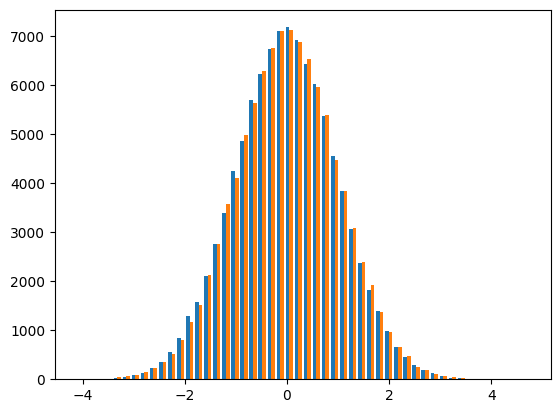

In [52]:
plt.hist(normal_samples, bins=50)
plt.show()

c) How can you check if your random numbers really follow the distribution from 3 a)?

In [53]:
mean = np.mean(normal_samples_z1)
std_dev = np.std(normal_samples_z1)

print(f"Mean: {mean},\n Std: {std_dev}")

Mean: -0.0010120912017266045,
 Std: 0.9996481046109534


Mean: The mean of your sample is very close to the expected mean of 0 for the standard normal distribution. This suggests that the random numbers are centered around 0, which is consistent with the standard normal distribution.

Standard Deviation: The estimated standard deviation is very close to the expected standard deviation of 1.0 for the standard normal distribution. This indicates that the spread or dispersion of your random numbers is similar to what you would expect from a standard normal distribution

Task P1.4
Eponentially distributed random numbers

a) Implement a way to generate exponentially distributed one-dimensional random numbers. Make
sure that your implementation can be parametrized.

In [56]:
def generate_exponential_samples(l, n_samples):

    u = 42
    a = 1103515245
    b = 12345
    m = 2**31

    exponential_samples = []

    for _ in range(n_samples):
        u = random_number(a, b, m, u)
        number = -(1/l) * np.log(1-u/m)
        exponential_samples.append(number)

    return exponential_samples

b) Use the random number generator from 4 a) to create a sample set of random numbers. Estimate
the parameters of the underlying exponential distribution from this sample set. What do you
observe? How accurate is your parameter estimate? What happens if the size of the sample set
changes?

In [57]:
exponential_samples = generate_exponential_samples(3, 100000)

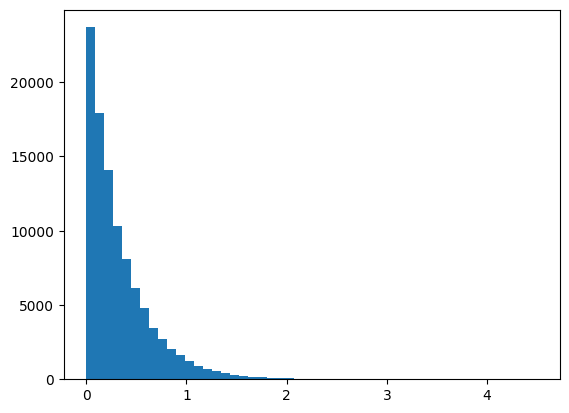

In [58]:
plt.hist(exponential_samples, bins=50)
plt.show()

c) How can you check if your random numbers really follow the distribution from 4 a)?

In [59]:
sum_x = 0
for x in exponential_samples:
    sum_x += x

est_lambda = 1/(1/len(exponential_samples)*sum_x)
print(est_lambda)

3.0028241741198203


Task P1.5
Normally distributed multivariate random numbers

a) Implement a way to generate normally distributed random vectors of dimensions 2, 5 and 10
with mean vector μ = 0 and covariance matrix Σ = I.

In [60]:
def generate_norm_dist_random_vec(mean, cov):
    return np.random.multivariate_normal(mean, cov)

def generate_norm_dist_random_vec_zero_ident(dim):
    # mean vector of zeros, covariance matrix = identity matrix
    return generate_norm_dist_random_vec(np.zeros(dim), np.eye(dim))

In [61]:
vec2 = generate_norm_dist_random_vec_zero_ident(2)
vec5 = generate_norm_dist_random_vec_zero_ident(5)
vec10 =generate_norm_dist_random_vec_zero_ident(10)

b) Use the random vector generator from 5 a) to create a sample set of random vectors. Estimate the
parameters of the underlying normal distribution from this sample set. What do you observe?
How accurate is your parameter estimate? What happens if the size of the sample set changes?

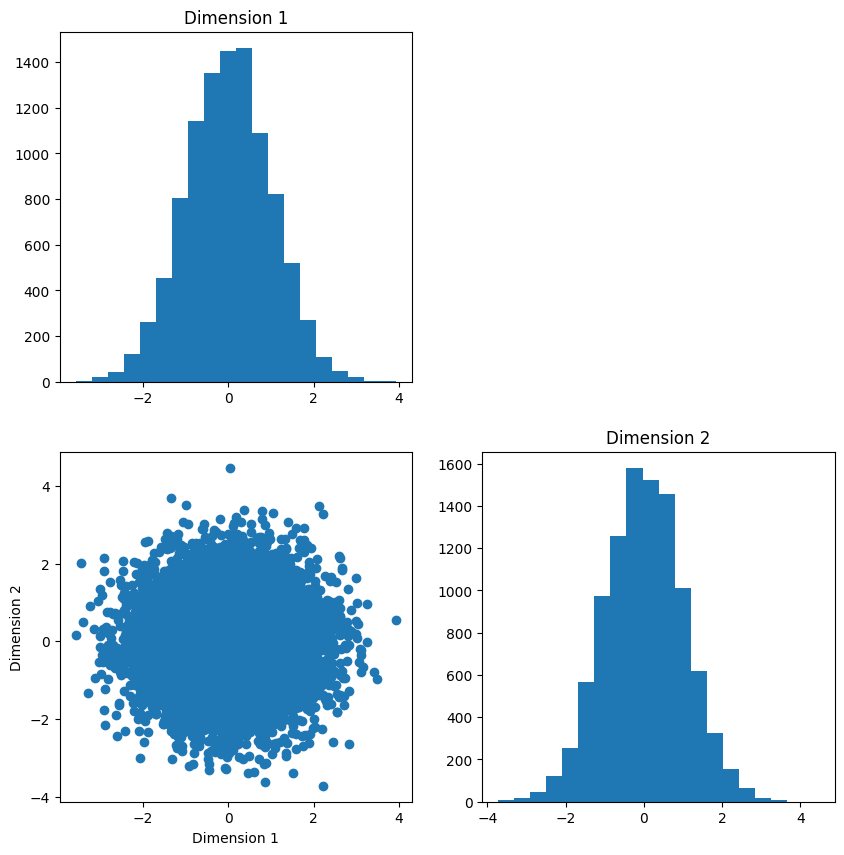

In [62]:
n_samples = 10000
generated_samples = []

for _ in range(n_samples):
    generated_samples.append(generate_norm_dist_random_vec_zero_ident(2))

generated_samples = np.asarray(generated_samples)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(generated_samples[:, 0], bins=20)
ax[0, 0].set_title('Dimension 1')
ax[1, 0].scatter(generated_samples[:, 0], generated_samples[:, 1])
ax[1, 0].set_xlabel('Dimension 1')
ax[1, 0].set_ylabel('Dimension 2')
ax[1, 1].hist(generated_samples[:, 1], bins=20)
ax[1, 1].set_title('Dimension 2')
ax[0, 1].axis('off')
plt.show()

In [63]:
mean_est = np.mean(generated_samples, axis=0)
cov_est = np.cov(generated_samples, rowvar=False)
print("Mean estimation", mean_est)
print("Cov estimation", cov_est)

Mean estimation [-0.00314081  0.01342482]
Cov estimation [[0.99904699 0.01425255]
 [0.01425255 1.01549983]]


c) Implement a way to generate normally distributed random vectors of dierent dimensions with
mean vectors μ̸ = 0 and covariance matrices Σ̸ = I of your choice.

In [64]:
def generate_special_norm_dist_random_vec():
    return generate_norm_dist_random_vec(np.ones(2), np.array([[1, 0.8],
                       [0.8, 1]]))


d) Use the random vector generator from 5 c) to create a sample set of random vectors. Estimate the
parameters of the underlying normal distribution from this sample set. What do you observe?
How accurate is your parameter estimate? What happens if the size of the sample set changes?
What if the dimensionality changes?

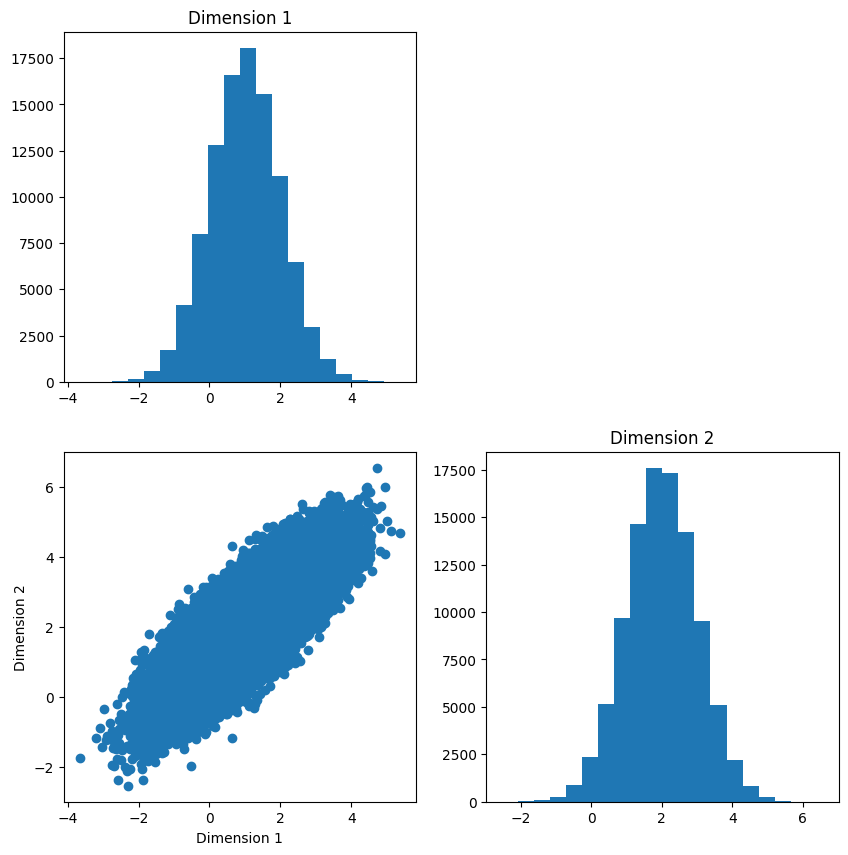

In [65]:
n_samples = 100000
generated_samples = []

mean = np.array([1, 2])
covariance = np.array([[1, 0.8],
                       [0.8, 1]])

for _ in range(n_samples):
    generated_samples.append(generate_norm_dist_random_vec(mean, covariance))

generated_samples = np.asarray(generated_samples)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(generated_samples[:, 0], bins=20)
ax[0, 0].set_title('Dimension 1')
ax[1, 0].scatter(generated_samples[:, 0], generated_samples[:, 1])
ax[1, 0].set_xlabel('Dimension 1')
ax[1, 0].set_ylabel('Dimension 2')
ax[1, 1].hist(generated_samples[:, 1], bins=20)
ax[1, 1].set_title('Dimension 2')
ax[0, 1].axis('off')
plt.show()

In [66]:
def estimate_cov(N, mean, x):
    res_matrix = np.zeros((2, 2))

    for i in range(N):
        res_matrix += np.outer(x[i] - mean, x[i] - mean)

    return res_matrix / N


In [67]:
mean_est = np.mean(generated_samples, axis=0)
cov_est = np.cov(generated_samples, rowvar=False)
cov_est_2 = estimate_cov(n_samples, mean_est, generated_samples)
print("Mean estimation", mean_est)
print(f"Cov estimation Numpy\n {cov_est},\nCov estimation our\n {cov_est_2}")

Mean estimation [0.99797839 2.00607106]
Cov estimation Numpy
 [[0.9938717  0.79433367]
 [0.79433367 0.99635632]],
Cov estimation our
 [[0.99386176 0.79432572]
 [0.79432572 0.99634636]]


Task P1.6
Basic Importance Sampling example

a) Given a set of N random numbers x that follow a standard normal distribution x ∼ N (0.0, 1.0).
Estimate the probability that these random numbers satisfy the condition x < θ for any θ
with and without Importance Sampling. Think about suitable Importance Sampling proposal
functions.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
import scipy.stats as stats

In [72]:
def est_with_imp(x, y, theta):
    mu, std = stats.norm.fit(x)
    est = 0
    for current_y in y:
        if current_y < theta:
            est = est + stats.norm.pdf(current_y, loc=mu, scale=std)/stats.uniform.pdf(current_y, loc=np.min(y), scale=np.max(y)-np.min(y))
    return est/len(y)

In [73]:
n_samples = 50000
theta = -20
x = np.random.normal(0, 1, size=n_samples) # reference distribution
y = np.random.uniform(-30, 2, n_samples) # proposal distribution

In [74]:
# no importance sampling
prob_est_no_imp = np.mean(x < theta)
print("no importance sampling:  ", prob_est_no_imp)

# importance sampling
prob_est_imp = est_with_imp(x, y, theta)
print("with importance sampling:", prob_est_imp)

no importance sampling:   0.0
with importance sampling: 9.727960735542302e-90


b) Plot the estimation result using the two techniques (with and without Importance Sampling)
as a function of the parameter θ in a meaningful way.

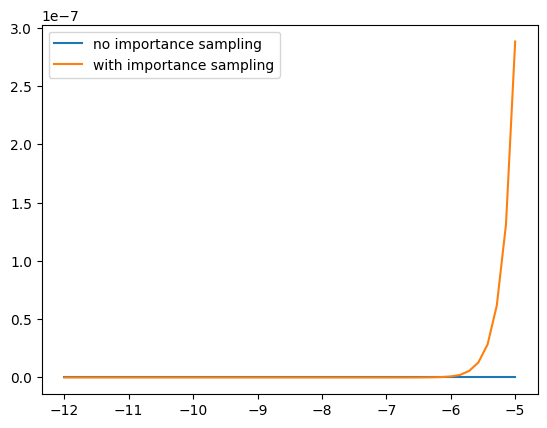

In [75]:
thetas = np.linspace(-12, -5, 50)
prob_ests_no_imp = []
prob_ests_imp = []
for theta_ in thetas:
    prob_ests_no_imp.append(np.mean(x < theta_))
    prob_ests_imp.append(est_with_imp(x, y, theta_))

fig, ax = plt.subplots()
ax.plot(thetas, prob_ests_no_imp, label='no importance sampling')
ax.plot(thetas, prob_ests_imp, label='with importance sampling')
ax.legend()
plt.show()

Task P1.7
Circle area estimation using Importance Sampling

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
import scipy.stats as stats

a) Given a square with side length 1. Place a circle of varying radius r ≤ 0.5 in the center of
this square. Generate uniformly distributed random samples x in the area of the interior of the
square. See Fig. 1 for an illustration how the scenario could look like.

In [77]:
# generate 2-dimensional random vectors with values betwen -0.5 and 0.5
n_samples = 1000
generated_samples = np.random.uniform(-0.5, 0.5, (n_samples, 2))
r = 0.5

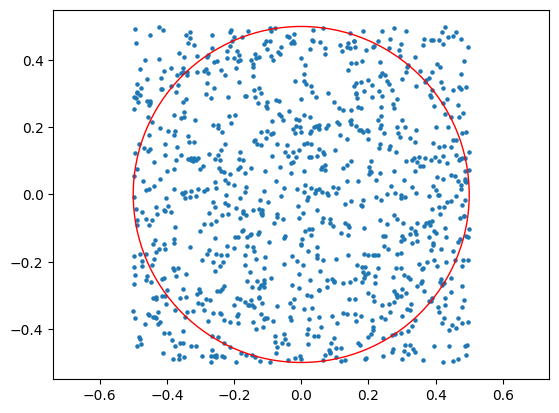

In [78]:
fig, ax = plt.subplots()
ax.scatter(generated_samples[:, 0], generated_samples[:, 1], s=5)
ax.add_patch(Circle((0,0), radius=r, fill=False, color='r'))
plt.axis('equal')
plt.show()

b) Estimate the area covered by the circle by counting the percentage of samples that fall into the
interior of the circle. I.e. all samples that have a distance smaller than r from the center of the
circle. How accurate is your estimate compared to the real area r2π of the circle?

In [79]:
real_circle_area_coverage = r * r * np.pi
print("real circle area coverage:      ", real_circle_area_coverage)

samples_inside_circle = 0
for sample in generated_samples:
    # check if euclidian distance to [0,0] < circle radius
    if np.linalg.norm(sample) < r:
        samples_inside_circle+=1
est_circle_area_coverage = samples_inside_circle / n_samples
print("estimated circle area coverage: ", est_circle_area_coverage)

real circle area coverage:       0.7853981633974483
estimated circle area coverage:  0.783


c) What happens to your estimation when r gets very small (e.g. r = 10−10)? Find a solution for
the problem using Importance Sampling. Use and compare two dierent proposal distributions.

In [80]:
def est_with_imp_circle(x, y, theta):
    est = 0
    for current_y in y:
        if np.linalg.norm(current_y) < theta:
            est = est + stats.uniform.pdf(current_y, loc=np.min(x), scale=np.max(x)-np.min(x))/stats.uniform.pdf(current_y, loc=np.min(y), scale=np.max(y)-np.min(y))
    return np.linalg.norm(est/len(y))

In [81]:
r = 10**(-10)
proposal_samples_a = np.random.uniform(-10**(-8), 10**(-8), (n_samples, 2))
proposal_samples_b = np.random.uniform(-10**(-30), 10**(-30), (n_samples, 2))
est_a = est_with_imp_circle(generated_samples, proposal_samples_a, r)
est_b = est_with_imp_circle(generated_samples, proposal_samples_b, r)

real_circle_area_coverage = r * r * np.pi
print("real circle area coverage:      ", real_circle_area_coverage)
print("estimated circle area coverage a: ", est_a)
print("estimated circle area coverage b: ", est_b)

real circle area coverage:       3.1415926535897936e-20
estimated circle area coverage a:  0.0
estimated circle area coverage b:  2.8266821347788043e-30


d) Think about the proper number of samples required for a stable estimate of the area. Find a
quality measure for the number of samples and plot your quality as a function of the number
of samples.

Estimating with 10 samples
Estimating with 100 samples
Estimating with 1000 samples
Estimating with 10000 samples
Estimating with 100000 samples


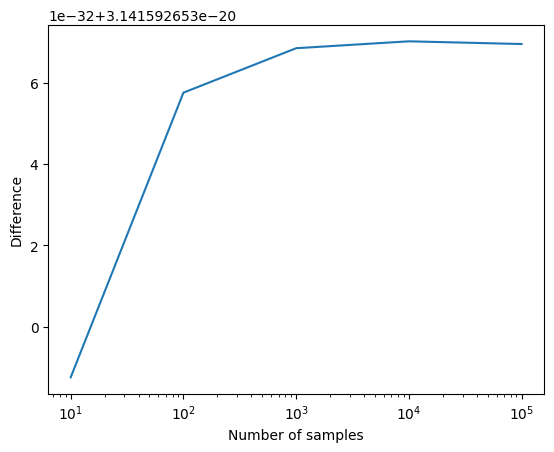

In [82]:
r = 10**(-10)
real_circle_area_coverage = r * r * np.pi
number_of_samples = [10, 100, 1000, 10000, 100000]
differences = []

for n_sample in number_of_samples:
    print(f"Estimating with {n_sample} samples")
    generated_samples = np.random.uniform(-0.5, 0.5, (n_sample, 2))
    proposal_samples = np.random.uniform(-10**(-30), 10**(-30), (n_sample, 2))
    estimation_area = est_with_imp_circle(generated_samples, proposal_samples, r)

    differences.append(np.abs(real_circle_area_coverage - estimation_area))

plt.plot(number_of_samples, differences)
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Difference')
plt.show()

Task P1.8
Realize an implementation of the EM algorithm in a programming language of your choice. Do not
use a pre-built implementation. A description of the algorithm is part of the lecture, but can also
be found in [2].
Test your implementation on the following scenarios, especially examining the accuracy and stability
of the estimate. Vary the initialization of the parameters.

a) Generate a synthetic sample set from a mixture distribution of your choice: n mixture com-
ponents and correspondingly many multidimensional normal distribution components. Estimate
the mixture parameters from this sample set using the correct number of mixture components

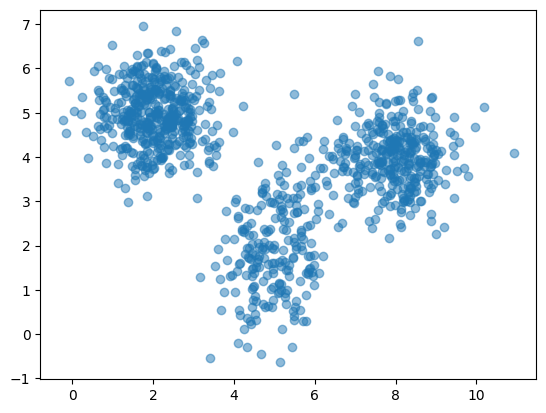

In [83]:
n_samples = 1000

# init parameters
mean1 = np.array([5, 2])
cov1 = np.array([[0.5, 0.25],[0.25, 1]])

mean2 = np.array([8, 4])
cov2 = np.array([[0.5, 0], [0, 0.5]])

mean3 = np.array([2, 5])
cov3 = np.array([[0.5, 0], [0, 0.5]])


# weight vector pi
pi = np.array([0.2, 0.35, 0.45])

i = np.random.multinomial(n_samples, pi, size=1).reshape(-1,1)

samples = np.zeros((n_samples, 2))
for idx in range(n_samples):
    if(idx < i[0]):
        samples[idx] = np.random.multivariate_normal(mean1, cov1)
    elif(idx < i[1] + i[0]):
        samples[idx] = np.random.multivariate_normal(mean2, cov2)
    else:
        samples[idx] = np.random.multivariate_normal(mean3, cov3)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [84]:


def normal_pdf(x, mean, cov):
    d = x.shape[1]
    diff = x - mean
    exponent = np.exp(-0.5 * np.sum(diff * np.linalg.solve(cov, diff.T).T, axis=1))
    normalize = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    return exponent / normalize

def em_alg(samples, k, iterations):
    fig, axs = plt.subplots(2, 5, figsize=(15, 5))

    mean_k = np.random.randn(k, 2)
    cov_k = np.array([np.eye(2)] * k)
    pi_k = np.ones(k) / k

    for i in range(iterations):
        # e-step
        r_in = np.zeros((n_samples, k))
        for n in range(k):
            r_in[:, n] = pi_k[n] * normal_pdf(samples, mean_k[n], cov_k[n])
        r_in /= np.sum(r_in, axis=1, keepdims=True)

        # m-step
        R_n = np.sum(r_in, axis=0)
        pi_k = R_n / n_samples
        for n in range(k):
            mean_k[n] = np.sum(r_in[:, n].reshape((-1, 1)) * samples, axis=0) / R_n[n]
            diff = samples - mean_k[n]
            cov_k[n] = (r_in[:, n].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_n[n]

        #plot
        if( (i + 1) % (iterations // 10) == 0):
            plt_idx =  i // (iterations // 10)
            axs[plt_idx//5, plt_idx%5].scatter(samples[:, 0], samples[:, 1], alpha=0.5)
            axs[plt_idx//5, plt_idx%5].set_title(f'Iteration {i+1}')
            for n in range(k):
                # create ellipse object to cover cluster
                eigenvalues, eigenvectors = np.linalg.eigh(cov_k[n]  )
                angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
                ellipse = plt.matplotlib.patches.Ellipse(xy=mean_k[n],
                                                        width=4*np.sqrt(eigenvalues[0]),
                                                        height=4*np.sqrt(eigenvalues[1]),
                                                        angle=angle,
                                                        alpha=0.5,
                                                        facecolor="red")

                axs[plt_idx//5, plt_idx%5].add_patch(ellipse)
    plt.subplots_adjust(hspace=0.5, top=0.9, bottom=0.1)
    plt.show()
    return mean_k, cov_k, pi_k


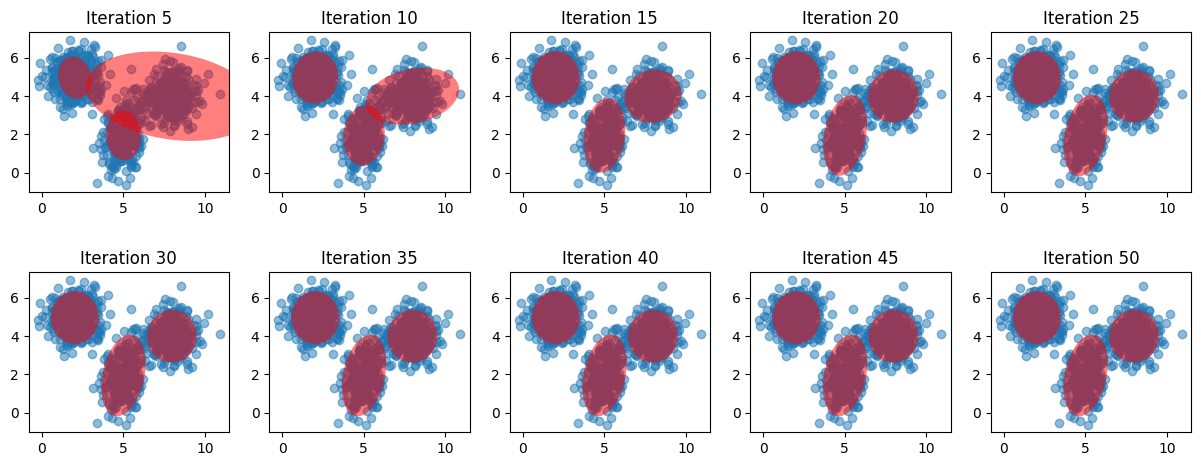

Comparison:
Actual mean 1: [5 2] Est mean 1: [5.0189939  1.94916681]
Actual mean 2: [8 4] Est mean 2: [7.98341557 3.99339628]
Actual mean 3: [2 5] Est mean 3: [2.03374892 4.96248469]

Actual cov 1:
 [[0.5  0.25]
 [0.25 1.  ]] 
Est cov 1:
 [[0.46190878 0.20796368]
 [0.20796368 1.13706434]]

Actual cov 2:
 [[0.5 0. ]
 [0.  0.5]] 
Est cov 2:
 [[0.58366341 0.00719987]
 [0.00719987 0.47610373]]

Actual cov 3:
 [[0.5 0. ]
 [0.  0.5]] 
Est cov 3:
 [[ 0.53795964 -0.00359672]
 [-0.00359672  0.47645916]]

Actual pi: [0.2  0.35 0.45] Est pi: [0.22167285 0.33354801 0.44477914]


In [85]:
k = 3
iterations = 50

mean_k, cov_k, pi_k = em_alg(samples, k, iterations)

print("Comparison:")
print("Actual mean 1:", mean1, "Est mean 1:", mean_k[0])
print("Actual mean 2:", mean2, "Est mean 2:", mean_k[1])
print("Actual mean 3:", mean3, "Est mean 3:", mean_k[2])

print("\nActual cov 1:\n", cov1, "\nEst cov 1:\n", cov_k[0])
print("\nActual cov 2:\n", cov2, "\nEst cov 2:\n", cov_k[1])
print("\nActual cov 3:\n", cov3, "\nEst cov 3:\n", cov_k[2])

print("\nActual pi:", pi, "Est pi:", pi_k)


b) Change the mean vectors and the covariance matrices for the mixture components. Does this
aect the EM algorithm?

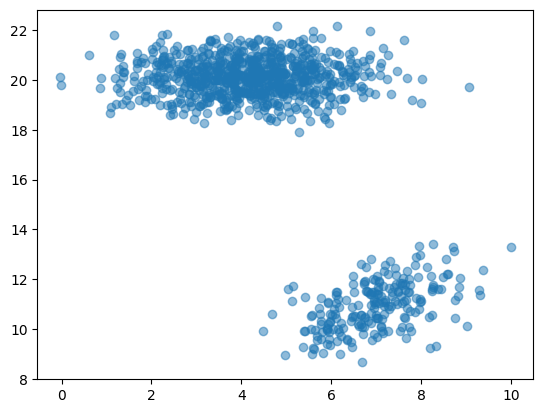

In [87]:
n_samples = 1000

# init parameters
mean1 = np.array([7, 11])
cov1 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.array([4, 20])
cov2 = np.array([[2, 0.0], [0.0, 0.5]])

mean3 = np.array([4.2, 20.2])
cov3 = np.array([[2, 0], [0, 0.6]])

# weight vector pi
pi = np.array([0.2, 0.35, 0.45])

i = np.random.multinomial(n_samples, pi, size=1).reshape(-1,1)

samples = np.zeros((n_samples, 2))
for idx in range(n_samples):
    if(idx < i[0]):
        samples[idx] = np.random.multivariate_normal(mean1, cov1)
    elif(idx < i[1]+ i[0]):
        samples[idx] = np.random.multivariate_normal(mean2, cov2)
    else:
        samples[idx] = np.random.multivariate_normal(mean3, cov3)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

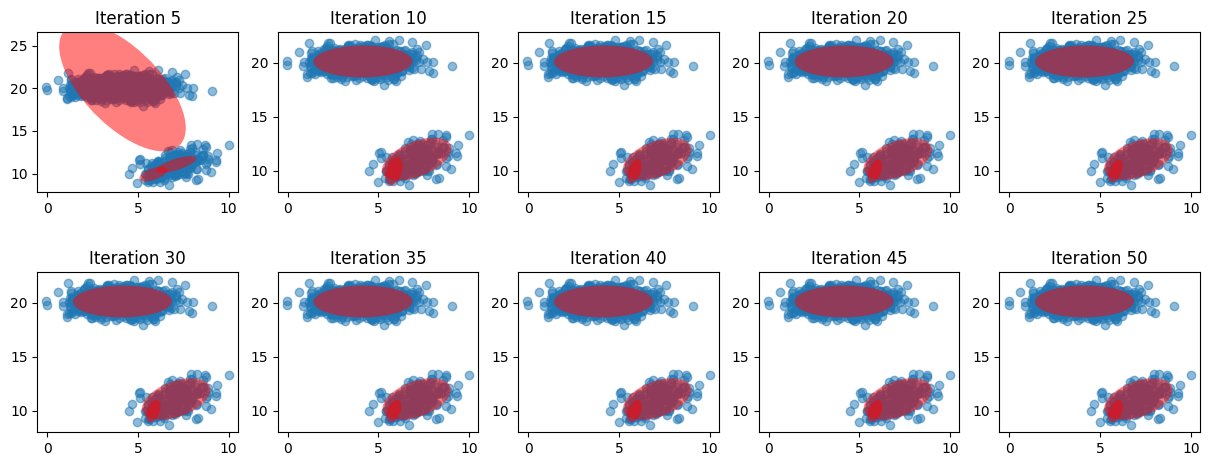

Comparison:
Actual mean 1: [ 7 11] Est mean 1: [5.84996697 9.93383494]
Actual mean 2: [ 4 20] Est mean 2: [ 4.15254397 20.11498662]
Actual mean 3: [ 4.2 20.2] Est mean 3: [ 7.11349585 11.06745282]

Actual cov 1:
 [[1.  0.5]
 [0.5 1. ]] 
Est cov 1:
 [[0.04230034 0.04309266]
 [0.04309266 0.26675784]]

Actual cov 2:
 [[2.  0. ]
 [0.  0.5]] 
Est cov 2:
 [[1.86328362 0.01819967]
 [0.01819967 0.54888092]]

Actual cov 3:
 [[2.  0. ]
 [0.  0.6]] 
Est cov 3:
 [[0.88447654 0.40073319]
 [0.40073319 0.92747094]]

Actual pi: [0.2  0.35 0.45] Est pi: [0.02218395 0.783      0.19481605]


In [88]:
k = 3
iterations = 50

mean_k, cov_k, pi_k = em_alg(samples, k, iterations)

print("Comparison:")
print("Actual mean 1:", mean1, "Est mean 1:", mean_k[0])
print("Actual mean 2:", mean2, "Est mean 2:", mean_k[1])
print("Actual mean 3:", mean3, "Est mean 3:", mean_k[2])

print("\nActual cov 1:\n", cov1, "\nEst cov 1:\n", cov_k[0])
print("\nActual cov 2:\n", cov2, "\nEst cov 2:\n", cov_k[1])
print("\nActual cov 3:\n", cov3, "\nEst cov 3:\n", cov_k[2])

print("\nActual pi:", pi, "Est pi:", pi_k)

c) Vary the size of the sample set and repeat the scenarios from 8 a) and 8 b). What do you observe?

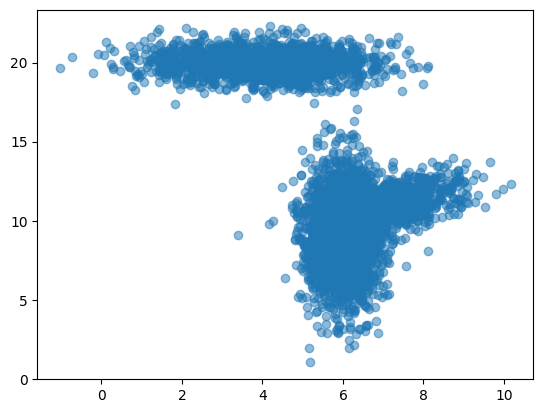

In [89]:
n_samples = 5000

# init parameters
mean1 = np.array([7, 11])
cov1 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.array([4, 20])
cov2 = np.array([[2, 0], [0, 0.5]])

mean3 = np.array([6, 9])
cov3 = np.array([[0.2, 0], [0, 5]])

# weight vector pi
pi = np.array([0.2, 0.35, 0.45])

i = np.random.multinomial(n_samples, pi, size=1).reshape(-1,1)

samples = np.zeros((n_samples, 2))
for idx in range(n_samples):
    if(idx < i[0]):
        samples[idx] = np.random.multivariate_normal(mean1, cov1)
    elif(idx < i[1] + i[0]):
        samples[idx] = np.random.multivariate_normal(mean2, cov2)
    else:
        samples[idx] = np.random.multivariate_normal(mean3, cov3)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

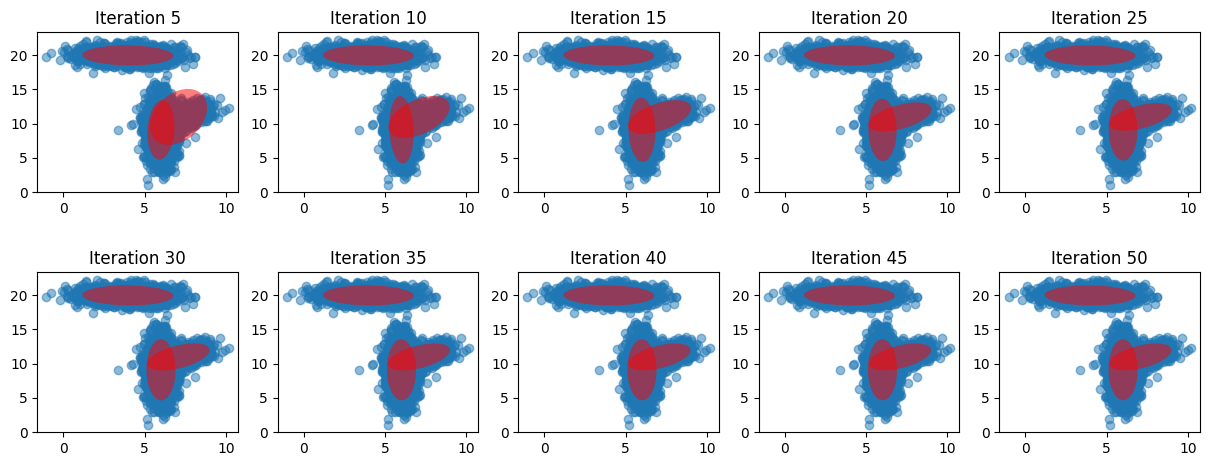

Comparison:
Actual mean 1: [ 7 11] Est mean 1: [6.00620593 9.10002674]
Actual mean 2: [ 4 20] Est mean 2: [ 7.0872898 10.9869534]
Actual mean 3: [6 9] Est mean 3: [ 3.9756554  19.96755718]

Actual cov 1:
 [[1.  0.5]
 [0.5 1. ]] 
Est cov 1:
 [[ 0.20050881 -0.01286815]
 [-0.01286815  4.96245269]]

Actual cov 2:
 [[2.  0. ]
 [0.  0.5]] 
Est cov 2:
 [[0.9052547  0.46582634]
 [0.46582634 0.95703729]]

Actual cov 3:
 [[0.2 0. ]
 [0.  5. ]] 
Est cov 3:
 [[ 1.95168427 -0.04407745]
 [-0.04407745  0.53558955]]

Actual pi: [0.2  0.35 0.45] Est pi: [0.46696709 0.18387188 0.34916103]


In [90]:
k = 3
iterations = 50

mean_k, cov_k, pi_k = em_alg(samples, k, iterations)

print("Comparison:")
print("Actual mean 1:", mean1, "Est mean 1:", mean_k[0])
print("Actual mean 2:", mean2, "Est mean 2:", mean_k[1])
print("Actual mean 3:", mean3, "Est mean 3:", mean_k[2])

print("\nActual cov 1:\n", cov1, "\nEst cov 1:\n", cov_k[0])
print("\nActual cov 2:\n", cov2, "\nEst cov 2:\n", cov_k[1])
print("\nActual cov 3:\n", cov3, "\nEst cov 3:\n", cov_k[2])

print("\nActual pi:", pi, "Est pi:", pi_k)

d) Vary the number of mixture components using more or less then used to create the sample set.
What do you observe?

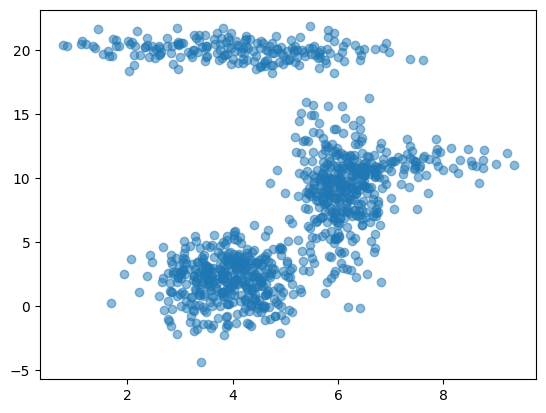

In [91]:
n_samples = 1000

# init parameters
mean1 = np.array([7, 11])
cov1 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.array([4, 20])
cov2 = np.array([[2, 0], [0, 0.5]])

mean3 = np.array([6, 9])
cov3 = np.array([[0.2, 0], [0, 8]])

mean4 = np.array([4, 2])
cov4 = np.array([[0.5, 0], [0, 3]])

# weight vector pi
pi = np.array([0.1, 0.2, 0.3, 0.4])

i = np.random.multinomial(n_samples, pi, size=1).reshape(-1,1)

samples = np.zeros((n_samples, 2))
for idx in range(n_samples):
    if(idx < i[0]):
        samples[idx] = np.random.multivariate_normal(mean1, cov1)
    elif(idx < i[1] + i[0]):
        samples[idx] = np.random.multivariate_normal(mean2, cov2)
    elif(idx < i[2] + i[1] + i[0]):
        samples[idx] = np.random.multivariate_normal(mean3, cov3)
    else:
        samples[idx] = np.random.multivariate_normal(mean4, cov4)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

LinAlgError: ignored

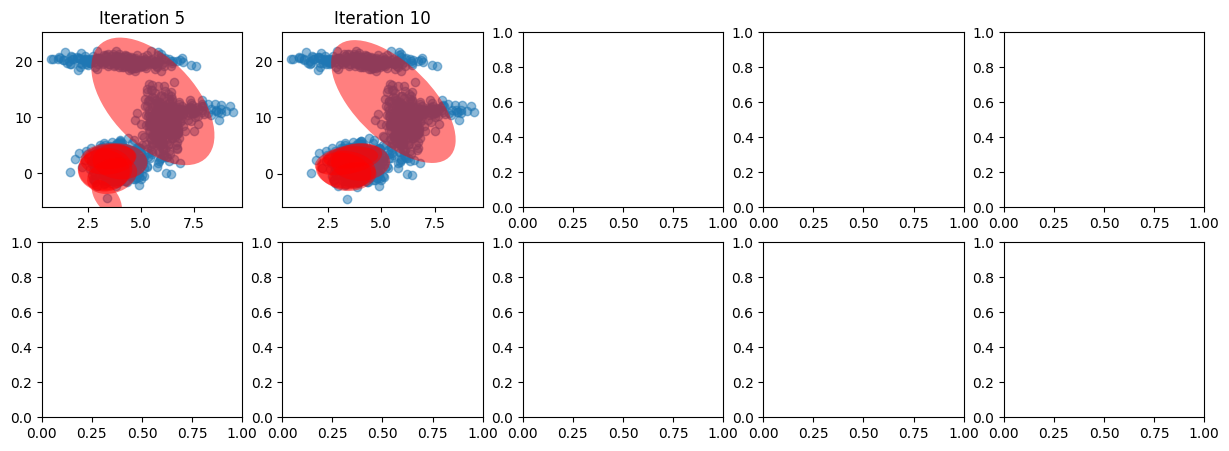

In [92]:
k = 8 # look how it performs with different k
iterations = 50

mean_k, cov_k, pi_k = em_alg(samples, k, iterations)

# comparison only works when component amount equals k
# print("Comparison:")
# print("Actual mean 1:", mean1, "Est mean 1:", mean_k[0])
# print("Actual mean 2:", mean2, "Est mean 2:", mean_k[1])
# print("Actual mean 3:", mean3, "Est mean 3:", mean_k[2])
# print("Actual mean 4:", mean4, "Est mean 4:", mean_k[3])

# print("\nActual cov 1:\n", cov1, "\nEst cov 1:\n", cov_k[0])
# print("\nActual cov 2:\n", cov2, "\nEst cov 2:\n", cov_k[1])
# print("\nActual cov 3:\n", cov3, "\nEst cov 3:\n", cov_k[2])
# print("\nActual cov 4:\n", cov4, "\nEst cov 4:\n", cov_k[3])

# print("\nActual pi:", pi, "Est pi:", pi_k)

e) What happens to the EM estimation process if you signicantly increase the dimensionality of
the distribution?

In [93]:
def em_alg_multi_dim(samples, k, iterations):
    num_samples, dim = samples.shape

    mean_k = np.random.randn(k, dim)
    cov_k = np.array([np.eye(dim)] * k)
    pi_k = np.ones(k) / k

    for i in range(iterations):
        # e-step
        r_in = np.zeros((num_samples, k))
        for n in range(k):
            r_in[:, n] = pi_k[n] * normal_pdf(samples, mean_k[n], cov_k[n])
        r_in /= np.sum(r_in, axis=1, keepdims=True)

        # m-step
        R_n = np.sum(r_in, axis=0)
        pi_k = R_n / num_samples
        for n in range(k):
            mean_k[n] = np.sum(r_in[:, n].reshape((-1, 1)) * samples, axis=0) / R_n[n]
            diff = samples - mean_k[n]
            cov_k[n] = (r_in[:, n].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_n[n]
    return mean_k, cov_k, pi_k

In [94]:
n_samples = 10000 # needs more samples to predict better
dims = 4

# init parameters
mean1 = np.array([5, 2, 1, 0])
cov1 = np.eye(dims)

mean2 = np.array([8, 4, 2, 3])
cov2 = np.eye(dims)

mean3 = np.array([2, 5, 3, 9])
cov3 = np.eye(dims)

# weight vector pi
pi = np.array([0.2, 0.35, 0.45])

i = np.random.multinomial(n_samples, pi, size=1).reshape(-1,1)

samples = np.zeros((n_samples, dims))
for idx in range(n_samples):
    if(idx < i[0]):
        samples[idx] = np.random.multivariate_normal(mean1, cov1)
    elif(idx < i[1] + i[0]):
        samples[idx] = np.random.multivariate_normal(mean2, cov2)
    else:
        samples[idx] = np.random.multivariate_normal(mean3, cov3)

In [95]:
k = 3
iterations = 50

mean_k, cov_k, pi_k = em_alg_multi_dim(samples, k, iterations)

print("Comparison:")
print("Actual mean 1:", mean1, "Est mean 1:", mean_k[0])
print("Actual mean 2:", mean2, "Est mean 2:", mean_k[1])
print("Actual mean 3:", mean3, "Est mean 3:", mean_k[2])

print("\nActual cov 1:\n", cov1, "\nEst cov 1:\n", cov_k[0])
print("\nActual cov 2:\n", cov2, "\nEst cov 2:\n", cov_k[1])
print("\nActual cov 3:\n", cov3, "\nEst cov 3:\n", cov_k[2])

print("\nActual pi:", pi, "Est pi:", pi_k)

Comparison:
Actual mean 1: [5 2 1 0] Est mean 1: [8.01624526 3.99151193 2.00402754 3.04157092]
Actual mean 2: [8 4 2 3] Est mean 2: [5.00204025 1.99252186 1.01651924 0.03964072]
Actual mean 3: [2 5 3 9] Est mean 3: [1.99823457 5.01105734 3.0082276  9.02155965]

Actual cov 1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
Est cov 1:
 [[ 1.03201587  0.04011938 -0.02658733  0.01369575]
 [ 0.04011938  0.98237047  0.00429805 -0.02589856]
 [-0.02658733  0.00429805  1.02919598  0.01696954]
 [ 0.01369575 -0.02589856  0.01696954  1.00528382]]

Actual cov 2:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
Est cov 2:
 [[ 1.02091278 -0.00933787  0.00957333  0.01727677]
 [-0.00933787  1.04343247 -0.03010284  0.03277167]
 [ 0.00957333 -0.03010284  0.9650878   0.04517725]
 [ 0.01727677  0.03277167  0.04517725  0.97565967]]

Actual cov 3:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
Est cov 3:
 [[ 1.0234261   0.01831598 -0.00338619  0.01135265]
 [ 0.018